In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from matplotlib import patheffects


In [8]:
reviews_df = pd.read_csv("reviews.csv")
calendar_df = pd.read_csv("calendar.csv")



C:\Users\DELL\AppData\Local\Temp\ipykernel_30096\2999610320.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df = pd.read_csv("calendar.csv")


In [3]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11156,19220,2009-12-05,52946,Jeff,Colleen was friendly and very helpful regardin...
1,11156,32592,2010-03-31,99382,Michael,"Great place, centrally located, easy walk to t..."
2,11156,42280,2010-05-14,105797,Marina,Colleen is very friendly and helpful. The apar...
3,11156,140942,2010-11-17,259213,Sigrid,Dear Colleen!\r<br/>My friend Diemut from Germ...
4,11156,151966,2010-12-11,273389,Eduardo,"Lovely, interesting chats and very helpful giv..."


In [4]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11156,2024-03-18,f,$65.00,NaN,90,180
1,11156,2024-03-19,t,$65.00,NaN,90,180
2,11156,2024-03-20,t,$65.00,NaN,90,180
3,11156,2024-03-21,t,$65.00,NaN,90,180
4,11156,2024-03-22,t,$65.00,NaN,90,180


In [26]:
# 转换日期格式
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')

# 移除无效日期行
reviews_df = reviews_df.dropna(subset=['date'])
calendar_df = calendar_df.dropna(subset=['date'])

# 将价格转换为数值类型
calendar_df['price'] = pd.to_numeric(calendar_df['price'], errors='coerce')

# 按月统计评论数量
reviews_df['year_month'] = reviews_df['date'].dt.to_period('M')
monthly_reviews = reviews_df.groupby('year_month').size()

# 按月统计可用和不可用的房源数量
calendar_df['year_month'] = calendar_df['date'].dt.to_period('M')
availability = calendar_df.groupby(['year_month', 'available']).size().unstack(fill_value=0)


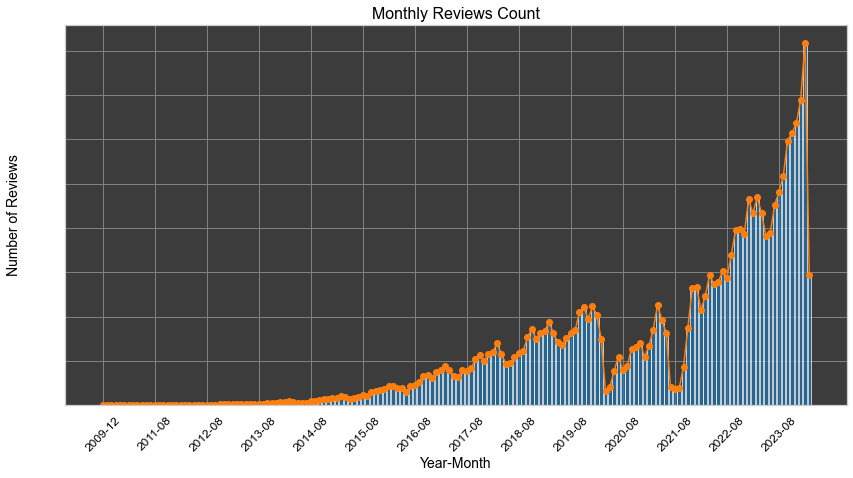

In [36]:
# 设置图表样式
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
ax = plt.gca()

# 设置背景颜色为较浅的灰色
ax.set_facecolor('#3c3c3c')

# 绘制柱状图
bars = ax.bar(monthly_reviews.index.astype(str), monthly_reviews.values, color='#1f77b4', alpha=0.7)

# 绘制折线图和数据点
ax.plot(monthly_reviews.index.astype(str), monthly_reviews.values, marker='o', color='#ff7f0e', linestyle='-', markersize=6)

# 添加图表标题和标签
ax.set_title('Monthly Reviews Count', fontsize=16, color='black')
ax.set_xlabel('Year-Month', fontsize=14, color='black')
ax.set_ylabel('Number of Reviews', fontsize=14, color='black')

# 调整X轴刻度
ax.set_xticks(range(0, len(monthly_reviews), 12))
ax.set_xticklabels([str(period) for period in monthly_reviews.index[::12]], rotation=45, fontsize=12, color='black')

# 调整Y轴刻度标签颜色
ax.tick_params(axis='y', colors='white')

# 显示网格线
plt.grid(True, color='gray')

# 显示图表
plt.show()

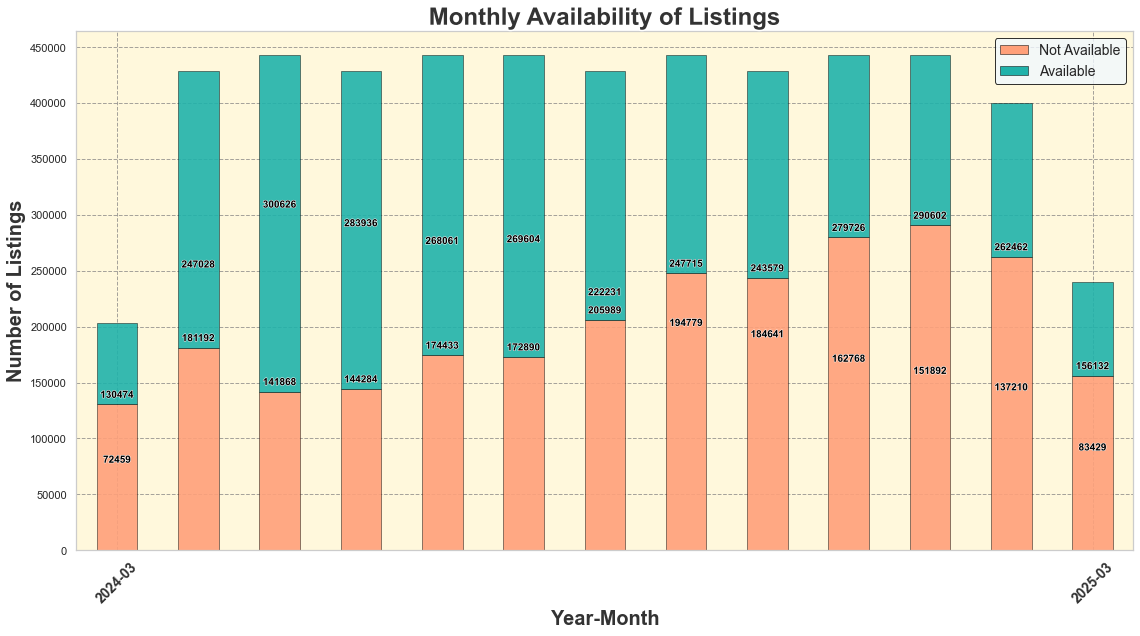

In [50]:
# 设置图表样式
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

# 创建梵高风格的配色
colors = ['#FFA07A', '#20B2AA']  # 鲑鱼色和淡蓝绿色
bg_color = '#FFF8DC'  # 玉米色背景

# 设置背景颜色
ax = plt.gca()
ax.set_facecolor(bg_color)

# 绘制房源可用性堆叠柱状图
bars = availability.plot(kind='bar', stacked=True, figsize=(16, 9), color=colors, edgecolor='black', linewidth=0.5, ax=ax)

# 添加图表标题和标签
plt.title('Monthly Availability of Listings', fontsize=24, weight='bold', color='#333333', path_effects=[patheffects.withStroke(linewidth=3, foreground='white')])
plt.xlabel('Year-Month', fontsize=20, weight='bold', color='#333333')
plt.ylabel('Number of Listings', fontsize=20, weight='bold', color='#333333')

# 调整X轴刻度
ax.set_xticks(range(0, len(availability), 12))
ax.set_xticklabels([str(period) for period in availability.index[::12]], rotation=45, fontsize=14, weight='bold', color='#333333')

# 设置Y轴刻度为整数
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# 设置图例
legend = plt.legend(['Not Available', 'Available'], fontsize=14, facecolor='#F0F8FF', edgecolor='black')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7, color='grey')

# 添加阴影效果
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)
    patch.set_alpha(0.9)

# 添加柱状图顶端的数值标签
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10,
                weight='bold',
                color='black',
                path_effects=[patheffects.withStroke(linewidth=1, foreground='white')])

# 显示图表
plt.tight_layout()
plt.show()

In [ ]:
# 转换日期格式
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# 移除无效日期行
reviews_df = reviews_df.dropna(subset=['date'])


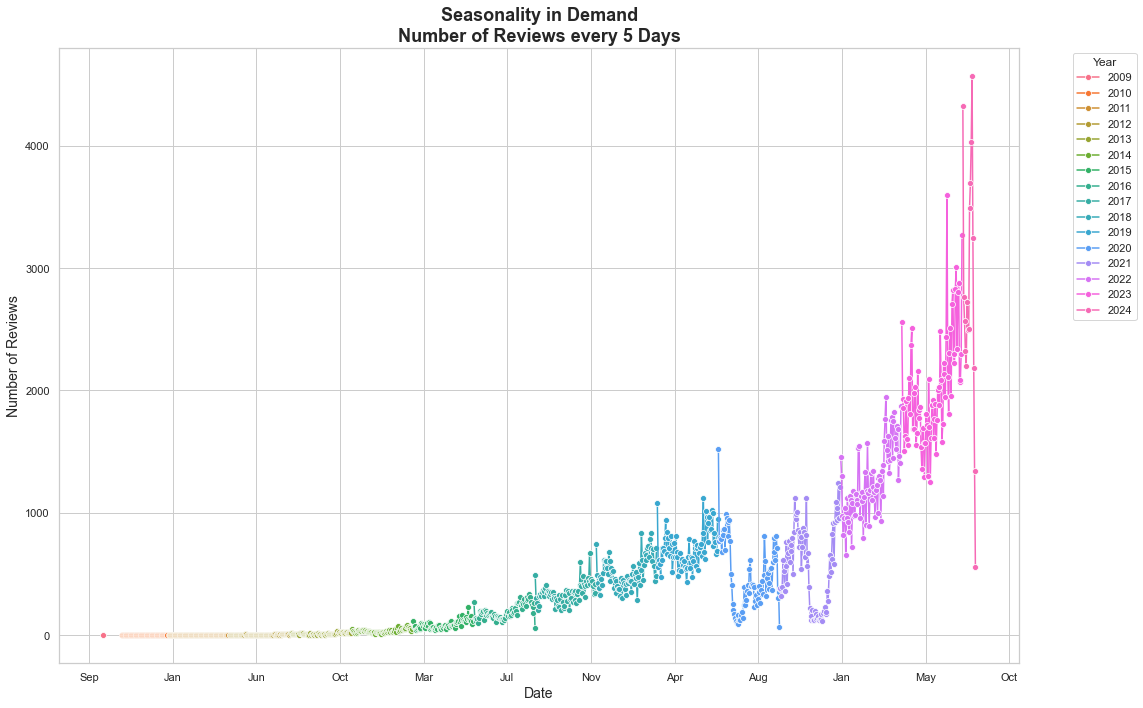

In [14]:
# 设置图表样式
sns.set(style="whitegrid")

# 创建图表
plt.figure(figsize=(16, 10))

# 使用颜色调色板
palette = sns.color_palette("husl", len(reviews_df['date'].dt.year.unique()))

for i, year in enumerate(reviews_df['date'].dt.year.unique()):
    year_data = reviews_df[reviews_df['date'].dt.year == year].copy()
    
    # 按5天重新采样评论数量
    year_data.set_index('date', inplace=True)
    resampled_data = year_data['id'].resample('5D').count().reset_index()
    
    # 绘制每年的曲线
    sns.lineplot(data=resampled_data, x='date', y='id', label=year, color=palette[i], marker='o')

# 设置标题和标签
plt.title('Seasonality in Demand\nNumber of Reviews every 5 Days', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整X轴标签
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

In [35]:
reviews_df = pd.read_csv("reviews.csv")
calendar_df = pd.read_csv("calendar.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_30716\754809175.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df = pd.read_csv("calendar.csv")


In [36]:
# 转换日期格式
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')

# 移除无效日期行
reviews_df = reviews_df.dropna(subset=['date'])
calendar_df = calendar_df.dropna(subset=['date'])

# 将价格转换为数值类型
calendar_df['price'] = pd.to_numeric(calendar_df['price'], errors='coerce')

# 按月统计评论数量
reviews_df['year_month'] = reviews_df['date'].dt.to_period('M')
monthly_reviews = reviews_df.groupby('year_month').size()

# 按月统计可用和不可用的房源数量
calendar_df['year_month'] = calendar_df['date'].dt.to_period('M')
availability = calendar_df.groupby(['year_month', 'available']).size().unstack(fill_value=0)

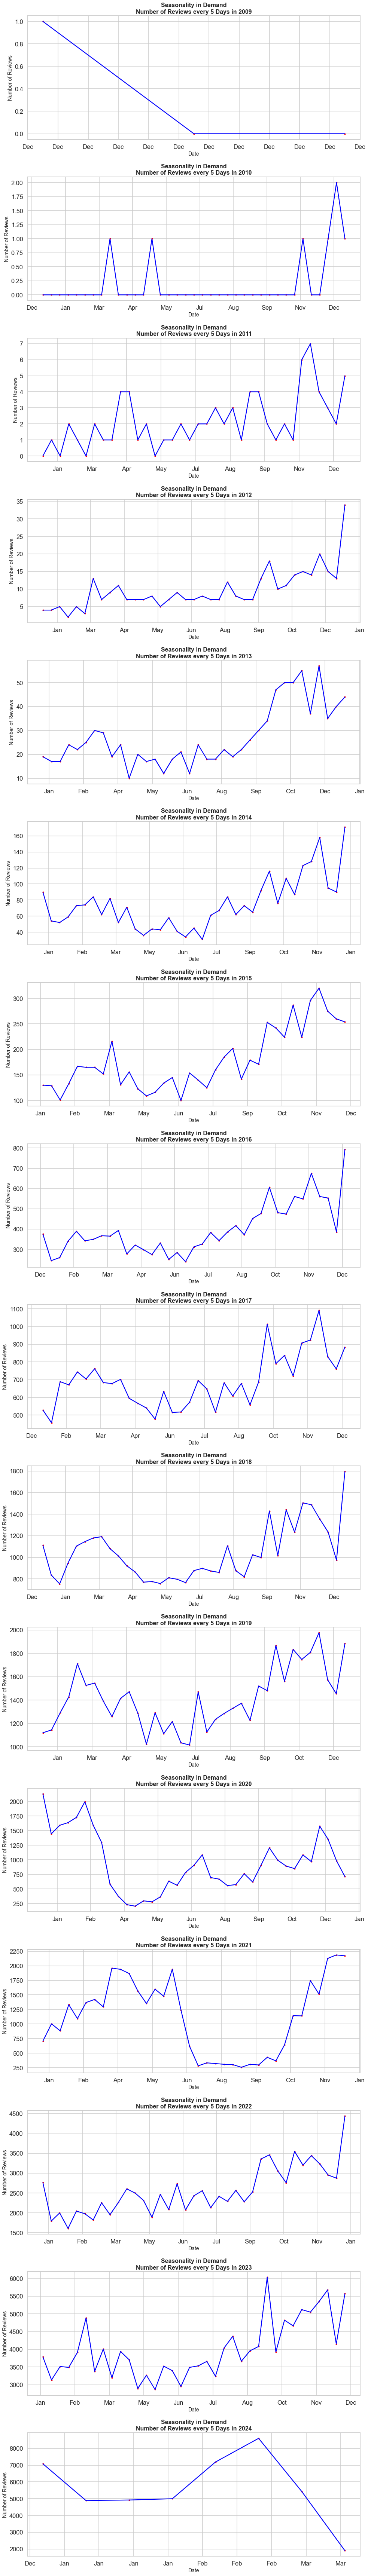

In [37]:

# 按5天重新采样评论数量
reviews_df.set_index('date', inplace=True)
resampled_data = reviews_df['id'].resample('10D').count().reset_index()

# 按年分割数据
resampled_data['year'] = resampled_data['date'].dt.year
years = resampled_data['year'].unique()

# 设置图表样式
sns.set(style="whitegrid", context="talk")

# 创建图表，每个子图显示一年的评论数量变化
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(14, 6 * n_years), sharex=False)

for i, year in enumerate(years):
    ax = axes[i]
    year_data = resampled_data[resampled_data['year'] == year]
    
    sns.scatterplot(data=year_data, x='date', y='id', ax=ax, color='red', s=20)
    sns.lineplot(data=year_data, x='date', y='id', ax=ax, color='blue', ci=None)
    
    ax.set_title(f'Seasonality in Demand\nNumber of Reviews every 5 Days in {year}', fontsize=16, weight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Number of Reviews', fontsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))

plt.tight_layout()
plt.show()

In [6]:
listings_df = pd.read_csv('listings.csv')

In [7]:
if 'last_review' in listings_df.columns:
    # Convert 'last_review' to datetime
    listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
    listings_df = listings_df.dropna(subset=['last_review'])
    
    # Extract year and month from 'last_review'
    listings_df['review_year'] = listings_df['last_review'].dt.year
    listings_df['review_month'] = listings_df['last_review'].dt.month

    # Calculate average price per month based on 'last_review'
    average_price_per_review_month = listings_df.groupby(['review_year', 'review_month'])['price'].mean().reset_index()

    # Plot average price per month based on 'last_review'
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=average_price_per_review_month, x='review_month', y='price', hue='review_year', marker='o')

    plt.title('Average Listing Price per Month Based on Last Review')
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()
else:
    print("The column 'last_review' is not present in the dataset.")


TypeError: Could not convert $225.00 to numeric

In [4]:
# Calculate overall average price per month (ignoring the year)
average_price_per_month_overall = listings_df.groupby(['review_month'])['price'].mean().reset_index()

# Plot overall average price per month
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_price_per_month_overall, x='review_month', y='price', marker='o')

plt.title('Overall Average Listing Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

TypeError: Could not convert $240.00$257.00$82.00$69.00$150.00$199.00$114.00$250.00$379.00$80.00$232.00$346.00$450.00$343.00$262.00$119.00$1,200.00$79.00$202.00$169.00$1,129.00$1,000.00$293.00$485.00$723.00$150.00$206.00$426.00$1,200.00$750.00$857.00$269.00$328.00$1,368.00$1,205.00$220.00$57.00$750.00$41.00$3,090.00$151.00$450.00$195.00$970.00$461.00$190.00$89.00$350.00$160.00$150.00$400.00$349.00$174.00$300.00$206.00$450.00$350.00$341.00$196.00$59.00$140.00$650.00$310.00$359.00$700.00$450.00$214.00$171.00$450.00$50.00$451.00$186.00$79.00$256.00$899.00$324.00$480.00$269.00$375.00$400.00$295.00$400.00$550.00$203.00$550.00$340.00$387.00$349.00$170.00$700.00$232.00$387.00$265.00$340.00$1,770.00$795.00$130.00$224.00$280.00$757.00$259.00$1,900.00$196.00$298.00$263.00$550.00$168.00$842.00$252.00$68.00$599.00$695.00$950.00$940.00$208.00$150.00$190.00$2,736.00$257.00$650.00$450.00$160.00$700.00$201.00$232.00$193.00$135.00$439.00$860.00$700.00$328.00$65.00$1,672.00$80.00$1,200.00$300.00$614.00$600.00$550.00$293.00$240.00$689.00$600.00$400.00$242.00$247.00$212.00$785.00$250.00$1,200.00$400.00$1,250.00$334.00$342.00$800.00$400.00$250.00$480.00$260.00$242.00$129.00$200.00$800.00$800.00$990.00$149.00$130.00$571.00$257.00$210.00$287.00$256.00$43.00$800.00$614.00$174.00$400.00$342.00$178.00$196.00$87.00$1,008.00$600.00$395.00$293.00$105.00$1,027.00$206.00$350.00$464.00$187.00$2,200.00$194.00$300.00$248.00$230.00$1,500.00$336.00$90.00$89.00$290.00$450.00$499.00$1,400.00$564.00$646.00$316.00$100.00$300.00$510.00$714.00$94.00$600.00$50.00$300.00$464.00$600.00$122.00$1,254.00$650.00$150.00$132.00$195.00$139.00$140.00$214.00$660.00$795.00$238.00$620.00$380.00$429.00$240.00$500.00$1,500.00$90.00$2,000.00$160.00$81.00$800.00$657.00$1,999.00$82.00$427.00$1,400.00$2,200.00$221.00$176.00$64.00$1,400.00$140.00$326.00$600.00$200.00$800.00$70.00$429.00$300.00$165.00$205.00$373.00$900.00$70.00$217.00$750.00$27.00$590.00$750.00$488.00$219.00$52.00$749.00$480.00$222.00$1,059.00$82.00$137.00$343.00$50.00$226.00$1,793.00$1,259.00$291.00$237.00$531.00$299.00$180.00$236.00$500.00$336.00$204.00$500.00$429.00$1,500.00$200.00$250.00$352.00$171.00$643.00$500.00$1,112.00$85.00$380.00$800.00$276.00$360.00$550.00$2,750.00$89.00$400.00$2,600.00$400.00$450.00$352.00$550.00$414.00$750.00$425.00$800.00$1,400.00$980.00$225.00$275.00$135.00$850.00$621.00$190.00$607.00$1,800.00$549.00$2,000.00$45.00$700.00$1,000.00$155.00$1,000.00$399.00$659.00$250.00$261.00$167.00$857.00$320.00$300.00$299.00$850.00$141.00$395.00$650.00$175.00$66.00$64.00$610.00$275.00$450.00$181.00$320.00$600.00$89.00$399.00$1,500.00$209.00$1,463.00$385.00$425.00$290.00$500.00$680.00$309.00$200.00$208.00$1,000.00$340.00$200.00$1,786.00$273.00$2,096.00$228.00$885.00$523.00$2,071.00$220.00$125.00$240.00$443.00$439.00$2,773.00$1,714.00$98.00$82.00$650.00$275.00$1,068.00$500.00$950.00$349.00$373.00$350.00$320.00$900.00$500.00$140.00$469.00$324.00$850.00$3,593.00$336.00$240.00$450.00$750.00$418.00$844.00$150.00$1,450.00$512.00$593.00$1,850.00$150.00$48.00$400.00$50.00$90.00$450.00$150.00$364.00$521.00$100.00$56.00$800.00$180.00$350.00$179.00$109.00$219.00$360.00$75.00$88.00$397.00$127.00$212.00$361.00$350.00$455.00$750.00$271.00$336.00$240.00$500.00$800.00$100.00$150.00$930.00$429.00$300.00$148.00$155.00$545.00$1,769.00$250.00$750.00$320.00$400.00$300.00$200.00$660.00$201.00$304.00$700.00$48.00$1,250.00$720.00$251.00$364.00$1,436.00$117.00$281.00$248.00$1,500.00$428.00$799.00$800.00$180.00$170.00$599.00$149.00$425.00$423.00$600.00$55.00$110.00$895.00$300.00$400.00$900.00$202.00$301.00$230.00$148.00$350.00$1,977.00$693.00$159.00$80.00$176.00$164.00$71.00$189.00$232.00$271.00$264.00$420.00$2,000.00$364.00$274.00$400.00$180.00$180.00$280.00$207.00$325.00$246.00$360.00$239.00$750.00$277.00$173.00$93.00$133.00$902.00$571.00$400.00$280.00$148.00$70.00$590.00$250.00$145.00$127.00$143.00$350.00$1,080.00$2,099.00$945.00$311.00$899.00$1,400.00$286.00$350.00$750.00$680.00$148.00$690.00$320.00$429.00$893.00$135.00$374.00$399.00$500.00$114.00$1,027.00$363.00$155.00$160.00$495.00$644.00$120.00$750.00$657.00$404.00$200.00$135.00$216.00$239.00$80.00$300.00$346.00$540.00$85.00$211.00$65.00$115.00$249.00$371.00$150.00$233.00$337.00$330.00$140.00$285.00$170.00$583.00$336.00$197.00$264.00$450.00$993.00$391.00$197.00$300.00$516.00$160.00$350.00$622.00$600.00$179.00$245.00$296.00$349.00$950.00$246.00$229.00$170.00$161.00$217.00$1,000.00$187.00$1,150.00$148.00$250.00$325.00$2,508.00$964.00$150.00$280.00$250.00$380.00$128.00$253.00$183.00$180.00$1,250.00$800.00$101.00$180.00$75.00$750.00$222.00$389.00$543.00$250.00$171.00$657.00$350.00$457.00$52.00$220.00$400.00$280.00$236.00$282.00$420.00$300.00$220.00$450.00$600.00$290.00$406.00$350.00$1,000.00$450.00$257.00$250.00$154.00$800.00$218.00$223.00$420.00$189.00$600.00$815.00$652.00$69.00$329.00$2,200.00$343.00$246.00$425.00$1,232.00$192.00$290.00$1,200.00$373.00$1,531.00$215.00$343.00$500.00$300.00$69.00$882.00$731.00$764.00$129.00$373.00$380.00$100.00$46.00$295.00$330.00$709.00$9,999.00$381.00$220.00$793.00$177.00$300.00$300.00$329.00$850.00$450.00$454.00$238.00$164.00$1,200.00$640.00$1,250.00$99.00$200.00$600.00$322.00$300.00$235.00$179.00$156.00$880.00$190.00$490.00$361.00$61.00$384.00$480.00$1,166.00$659.00$40.00$1,500.00$49.00$213.00$260.00$183.00$85.00$450.00$40.00$1,917.00$686.00$188.00$80.00$750.00$84.00$375.00$326.00$250.00$1,364.00$1,200.00$2,000.00$245.00$98.00$380.00$385.00$135.00$475.00$799.00$194.00$750.00$306.00$450.00$600.00$234.00$333.00$401.00$121.00$125.00$126.00$210.00$181.00$1,800.00$184.00$168.00$300.00$65.00$325.00$785.00$90.00$1,837.00$110.00$200.00$200.00$310.00$3,147.00$72.00$170.00$285.00$196.00$310.00$650.00$135.00$180.00$1,200.00$550.00$700.00$1,679.00$250.00$68.00$229.00$2,350.00$109.00$73.00$64.00$379.00$313.00$275.00$287.00$500.00$550.00$199.00$136.00$315.00$258.00$340.00$530.00$32.00$360.00$150.00$60.00$359.00$302.00$1,250.00$180.00$680.00$832.00$467.00$2,109.00$1,438.00$1,837.00$166.00$346.00$1,222.00$1,600.00$479.00$325.00$289.00$160.00$317.00$995.00$391.00$320.00$123.00$294.00$384.00$165.00$214.00$700.00$214.00$270.00$60.00$580.00$113.00$217.00$200.00$140.00$137.00$609.00$180.00$550.00$340.00$263.00$259.00$273.00$2,000.00$465.00$450.00$600.00$875.00$155.00$215.00$99.00$1,350.00$450.00$294.00$343.00$450.00$316.00$671.00$895.00$170.00$800.00$464.00$65.00$450.00$550.00$314.00$300.00$543.00$132.00$69.00$250.00$333.00$715.00$450.00$199.00$498.00$400.00$640.00$650.00$344.00$4,000.00$686.00$475.00$271.00$1,000.00$85.00$110.00$450.00$403.00$700.00$1,000.00$317.00$82.00$479.00$919.00$247.00$1,000.00$514.00$300.00$160.00$60.00$60.00$268.00$161.00$399.00$112.00$478.00$138.00$364.00$450.00$440.00$201.00$516.00$323.00$1,400.00$289.00$699.00$180.00$145.00$529.00$511.00$478.00$245.00$950.00$295.00$544.00$220.00$450.00$161.00$1,450.00$236.00$1,500.00$289.00$666.00$235.00$125.00$210.00$232.00$1,500.00$272.00$408.00$490.00$195.00$221.00$284.00$350.00$246.00$300.00$950.00$771.00$107.00$450.00$193.00$171.00$250.00$300.00$417.00$214.00$654.00$1,650.00$280.00$177.00$210.00$450.00$400.00$259.00$350.00$209.00$1,600.00$233.00$600.00$258.00$204.00$2,400.00$2,200.00$310.00$245.00$88.00$90.00$500.00$75.00$234.00$240.00$65.00$45.00$985.00$450.00$194.00$289.00$451.00$583.00$65.00$271.00$75.00$254.00$375.00$219.00$341.00$145.00$595.00$250.00$190.00$1,015.00$300.00$2,500.00$900.00$129.00$714.00$668.00$305.00$276.00$166.00$448.00$780.00$353.00$940.00$999.00$333.00$393.00$458.00$272.00$250.00$600.00$607.00$69.00$65.00$325.00$68.00$572.00$690.00$72.00$233.00$261.00$400.00$133.00$449.00$150.00$650.00$175.00$1,000.00$275.00$200.00$716.00$45.00$245.00$275.00$400.00$300.00$793.00$234.00$279.00$584.00$239.00$235.00$780.00$300.00$372.00$244.00$407.00$300.00$65.00$435.00$97.00$443.00$192.00$495.00$65.00$500.00$253.00$298.00$149.00$618.00$400.00$350.00$153.00$631.00$400.00$232.00$350.00$425.00$193.00$150.00$160.00$296.00$276.00$1,600.00$275.00$679.00$1,450.00$396.00$651.00$115.00$475.00$250.00$314.00$743.00$383.00$995.00$332.00$240.00$900.00$160.00$315.00$350.00$160.00$383.00$320.00$700.00$755.00$1,062.00$842.00$500.00$142.00$269.00$204.00$185.00$92.00$1,025.00$1,800.00$675.00$295.00$991.00$205.00$339.00$515.00$1,999.00$627.00$225.00$240.00$204.00$314.00$980.00$264.00$1,280.00$2,000.00$293.00$211.00$135.00$200.00$90.00$260.00$140.00$263.00$280.00$1,000.00$826.00$82.00$600.00$675.00$74.00$131.00$160.00$487.00$132.00$150.00$396.00$1,198.00$1,599.00$211.00$75.00$231.00$201.00$407.00$147.00$304.00$326.00$271.00$1,250.00$450.00$60.00$343.00$108.00$779.00$1,007.00$99.00$334.00$290.00$553.00$1,000.00$190.00$384.00$410.00$619.00$900.00$950.00$637.00$1,850.00$600.00$320.00$360.00$66.00$523.00$214.00$3,000.00$2,024.00$300.00$231.00$495.00$420.00$229.00$390.00$200.00$310.00$250.00$1,000.00$278.00$79.00$1,336.00$300.00$650.00$675.00$1,700.00$325.00$307.00$350.00$800.00$195.00$300.00$600.00$377.00$850.00$650.00$600.00$600.00$128.00$500.00$800.00$1,400.00$186.00$503.00$120.00$138.00$980.00$525.00$950.00$575.00$194.00$511.00$79.00$590.00$1,300.00$168.00$263.00$150.00$529.00$900.00$234.00$430.00$651.00$700.00$1,200.00$195.00$275.00$250.00$177.00$362.00$79.00$391.00$135.00$311.00$1,575.00$220.00$493.00$96.00$202.00$75.00$225.00$1,243.00$400.00$203.00$75.00$261.00$758.00$300.00$980.00$525.00$450.00$400.00$29.00$138.00$198.00$143.00$210.00$225.00$450.00$49.00$614.00$325.00$306.00$159.00$340.00$208.00$404.00$500.00$285.00$520.00$104.00$500.00$250.00$322.00$495.00$590.00$180.00$429.00$689.00$256.00$1,639.00$231.00$177.00$350.00$699.00$324.00$1,350.00$850.00$530.00$1,500.00$904.00$456.00$450.00$250.00$1,100.00$200.00$200.00$273.00$2,500.00$393.00$299.00$69.00$1,062.00$220.00$164.00$444.00$98.00$1,500.00$76.00$600.00$209.00$464.00$148.00$1,129.00$75.00$80.00$80.00$190.00$488.00$1,400.00$500.00$193.00$400.00$325.00$261.00$3,776.00$108.00$350.00$160.00$449.00$507.00$388.00$300.00$178.00$300.00$1,036.00$132.00$590.00$104.00$120.00$300.00$164.00$269.00$400.00$443.00$258.00$250.00$339.00$149.00$199.00$1,450.00$283.00$313.00$265.00$2,999.00$194.00$208.00$202.00$180.00$423.00$350.00$310.00$250.00$569.00$287.00$52.00$700.00$105.00$200.00$302.00$914.00$1,000.00$360.00$990.00$650.00$950.00$78.00$300.00$260.00$310.00$550.00$275.00$99.00$670.00$90.00$104.00$629.00$150.00$45.00$554.00$96.00$900.00$220.00$210.00$154.00$327.00$227.00$700.00$585.00$699.00$157.00$588.00$500.00$157.00$644.00$53.00$500.00$700.00$216.00$1,600.00$99,999.00$120.00$735.00$600.00$305.00$288.00$640.00$433.00$361.00$90.00$220.00$125.00$900.00$593.00$350.00$650.00$102.00$570.00$1,000.00$1,069.00$191.00$1,200.00$2,530.00$250.00$750.00$249.00$55.00$1,207.00$352.00$88.00$231.00$250.00$95.00$1,100.00$291.00$255.00$1,100.00$192.00$1,100.00$260.00$474.00$600.00$390.00$550.00$164.00$357.00$139.00$85.00$255.00$420.00$400.00$450.00$454.00$2,100.00$99.00$319.00$310.00$350.00$586.00$386.00$450.00$700.00$415.00$446.00$369.00$375.00$475.00$354.00$325.00$250.00$91.00$1,200.00$293.00$1,100.00$78.00$290.00$496.00$1,112.00$228.00$590.00$1,300.00$161.00$850.00$331.00$299.00$300.00$57.00$222.00$325.00$379.00$944.00$48.00$108.00$500.00$130.00$140.00$470.00$247.00$234.00$750.00$1,000.00$136.00$857.00$486.00$700.00$360.00$204.00$614.00$66.00$68.00$621.00$151.00$160.00$707.00$250.00$310.00$354.00$160.00$1,500.00$77.00$150.00$48.00$95.00$482.00$134.00$250.00$236.00$133.00$120.00$1,076.00$199.00$196.00$61.00$175.00$175.00$350.00$319.00$350.00$120.00$99.00$100.00$59.00$97.00$500.00$600.00$214.00$1,980.00$64.00$350.00$244.00$297.00$349.00$1,224.00$500.00$293.00$576.00$457.00$514.00$280.00$750.00$369.00$250.00$300.00$347.00$299.00$198.00$292.00$275.00$1,200.00$484.00$500.00$197.00$357.00$250.00$205.00$190.00$333.00$350.00$200.00$600.00$471.00$120.00$170.00$411.00$344.00$365.00$160.00$556.00$130.00$365.00$300.00$400.00$450.00$108.00$1,300.00$300.00$220.00$86.00$355.00$400.00$320.00$68.00$120.00$170.00$525.00$3,567.00$150.00$320.00$1,114.00$800.00$399.00$561.00$980.00$339.00$1,200.00$125.00$240.00$68.00$689.00$319.00$625.00$213.00$200.00$156.00$850.00$1,521.00$385.00$250.00$330.00$271.00$120.00$210.00$850.00$220.00$171.00$400.00$850.00$166.00$1,000.00$850.00$1,639.00$289.00$400.00$230.00$1,950.00$1,000.00$300.00$220.00$918.00$999.00$417.00$1,200.00$391.00$130.00$475.00$263.00$169.00$950.00$935.00$548.00$290.00$477.00$310.00$315.00$200.00$700.00$400.00$502.00$555.00$600.00$1,876.00$2,360.00$700.00$262.00$633.00$1,000.00$545.00$150.00$1,865.00$1,035.00$729.00$201.00$959.00$150.00$500.00 to numeric

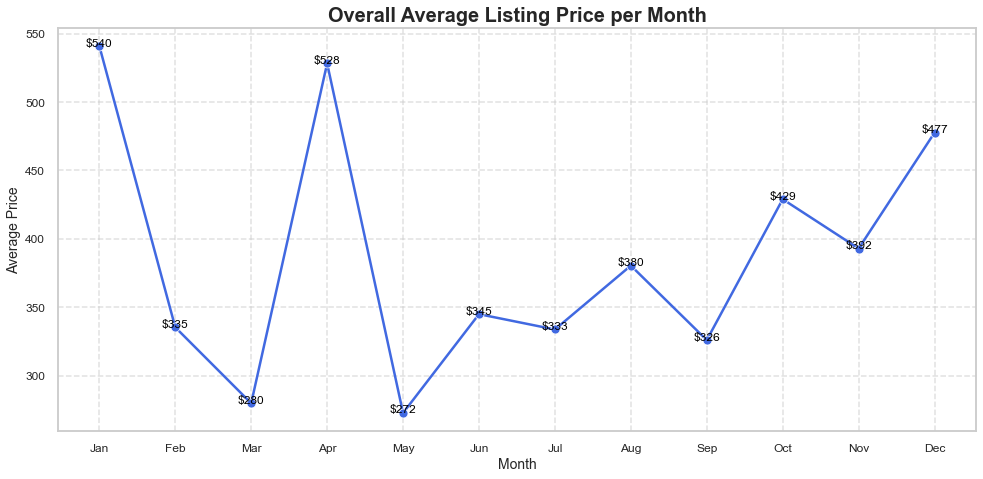

In [18]:
# Set a more sophisticated style
sns.set(style="whitegrid", context="talk")

# Plot overall average price per month with a more sophisticated style
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_price_per_month_overall, x='review_month', y='price', marker='o', linewidth=2.5, color='royalblue')

# Enhance the plot with titles and labels
plt.title('Overall Average Listing Price per Month', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

# Customize ticks and grid
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add data labels
for index, row in average_price_per_month_overall.iterrows():
    plt.text(row['review_month'], row['price'], f"${int(row['price'])}", color='black', ha="center", fontsize=12)

# Add a fancy legend (if applicable)
# plt.legend(title='Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

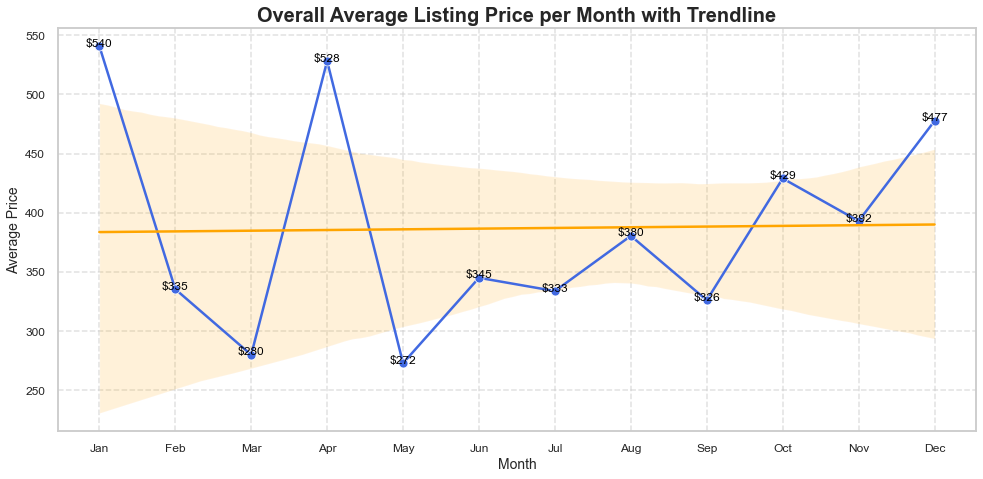

In [19]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_price_per_month_overall, x='review_month', y='price', marker='o', linewidth=2.5, color='royalblue')

# Add a trendline using a linear model fit
sns.regplot(data=average_price_per_month_overall, x='review_month', y='price', scatter=False, color='orange', line_kws={"linewidth": 2.5})

# Enhance the plot with titles and labels
plt.title('Overall Average Listing Price per Month with Trendline', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)

# Customize ticks and grid
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add data labels
for index, row in average_price_per_month_overall.iterrows():
    plt.text(row['review_month'], row['price'], f"${int(row['price'])}", color='black', ha="center", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

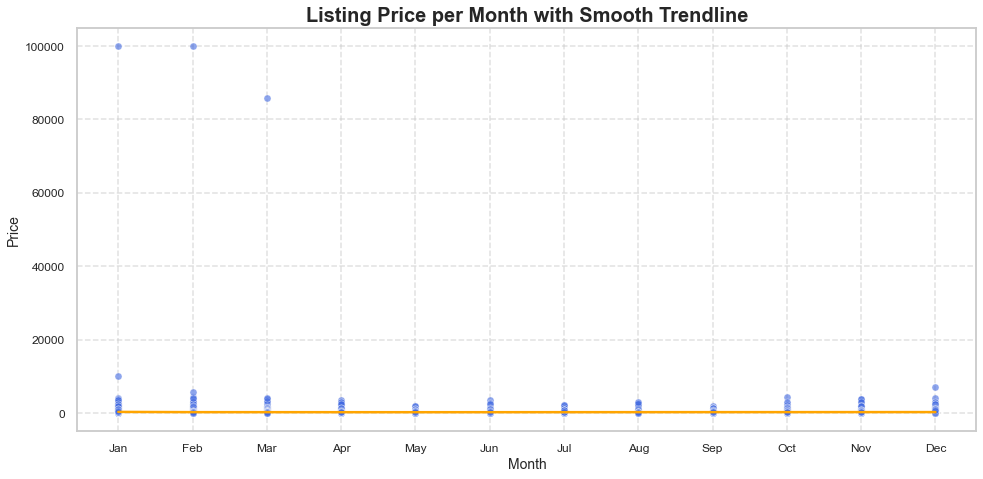

In [20]:
# Extract the necessary columns for the plot
listings_df_filtered = listings_df[['last_review', 'price']].dropna()

# Extract year, month, and day for detailed analysis
listings_df_filtered['review_year'] = listings_df_filtered['last_review'].dt.year
listings_df_filtered['review_month'] = listings_df_filtered['last_review'].dt.month

# Plot individual price points with a smooth trendline
plt.figure(figsize=(14, 7))
sns.scatterplot(data=listings_df_filtered, x='review_month', y='price', color='royalblue', s=50, alpha=0.6)

# Add a smooth trendline using LOWESS
sns.regplot(data=listings_df_filtered, x='review_month', y='price', scatter=False, lowess=True, color='orange', line_kws={"linewidth": 2.5})

# Enhance the plot with titles and labels
plt.title('Listing Price per Month with Smooth Trendline', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Customize ticks and grid
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

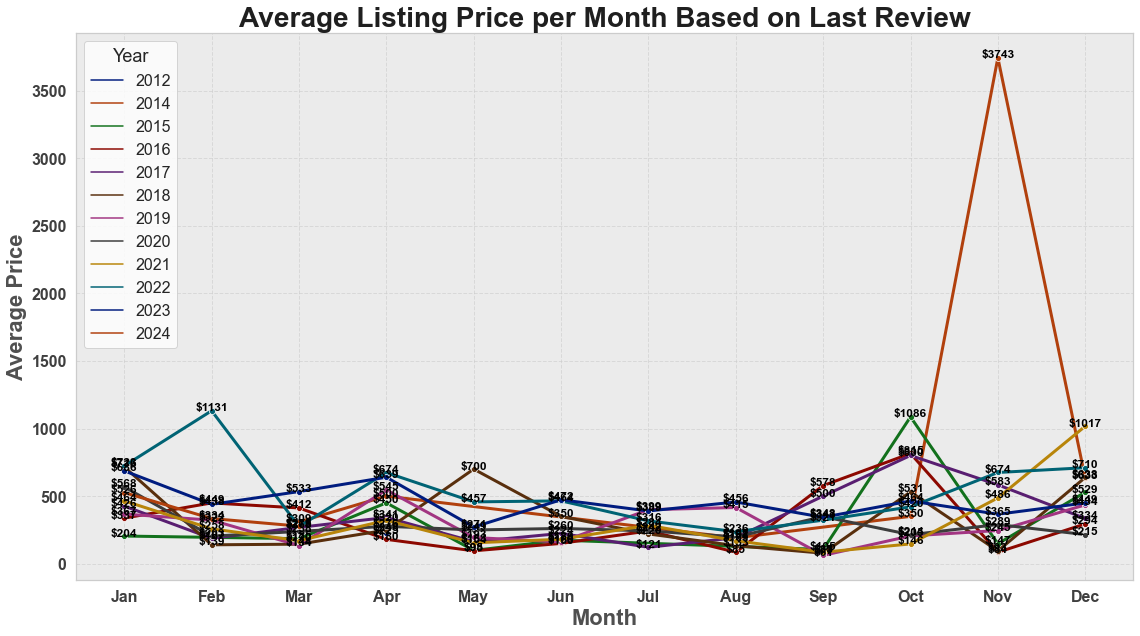

In [24]:
# Ensure 'price' column is numeric
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'last_review' to datetime
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
listings_df = listings_df.dropna(subset=['last_review'])

# Extract year and month from 'last_review'
listings_df['review_year'] = listings_df['last_review'].dt.year
listings_df['review_month'] = listings_df['last_review'].dt.month

# Calculate average price per month based on 'last_review'
average_price_per_review_month = listings_df.groupby(['review_year', 'review_month'])['price'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(16, 9))

# Use a high-contrast color palette
palette = sns.color_palette("dark", len(average_price_per_review_month['review_year'].unique()))

# Plot the data
sns.lineplot(
    data=average_price_per_review_month, 
    x='review_month', 
    y='price', 
    hue='review_year', 
    marker='o', 
    palette=palette,
    linewidth=3
)

# Enhance the plot with titles and labels
plt.title('Average Listing Price per Month Based on Last Review', fontsize=28, weight='bold', color='#1f1f1f')
plt.xlabel('Month', fontsize=22, weight='bold', color='#4f4f4f')
plt.ylabel('Average Price', fontsize=22, weight='bold', color='#4f4f4f')
plt.legend(title='Year', fontsize=16, title_fontsize='18')
plt.grid(True, linestyle='--', alpha=0.6)

# Customize ticks and grid
plt.xticks(
    ticks=range(1, 13), 
    labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ], 
    fontsize=16, 
    weight='bold', 
    color='#3f3f3f'
)
plt.yticks(fontsize=16, weight='bold', color='#3f3f3f')

# Add a background gradient
ax = plt.gca()
ax.patch.set_facecolor('#e7e7e7')
ax.patch.set_alpha(0.8)

# Add data labels
for index, row in average_price_per_review_month.iterrows():
    plt.text(row['review_month'], row['price'], f"${int(row['price'])}", color='black', ha="center", fontsize=12, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

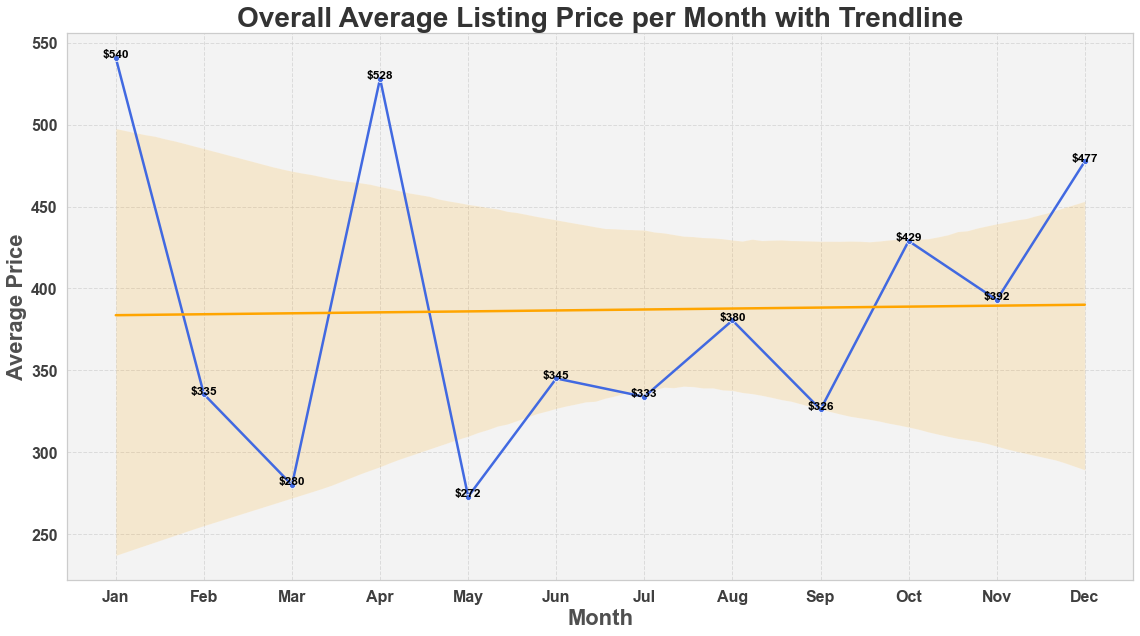

In [25]:
# Ensure 'price' column is numeric
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'last_review' to datetime
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'], errors='coerce')
listings_df = listings_df.dropna(subset=['last_review'])

# Extract year and month for grouping
listings_df['review_year'] = listings_df['last_review'].dt.year
listings_df['review_month'] = listings_df['last_review'].dt.month

# Calculate average price per month based on 'last_review'
average_price_per_month_overall = listings_df.groupby(['review_month'])['price'].mean().reset_index()

# Plot average price per month based on 'last_review' with enhanced style
plt.figure(figsize=(16, 9))

# Use a high-contrast color palette
palette = sns.color_palette("coolwarm", as_cmap=True)

# Plot the data
sns.lineplot(
    data=average_price_per_month_overall, 
    x='review_month', 
    y='price', 
    marker='o', 
    color='royalblue',
    linewidth=2.5
)

# Add a trendline using a linear model fit
sns.regplot(data=average_price_per_month_overall, x='review_month', y='price', scatter=False, color='orange', line_kws={"linewidth": 2.5})

# Enhance the plot with titles and labels
plt.title('Overall Average Listing Price per Month with Trendline', fontsize=28, weight='bold', color='#333')
plt.xlabel('Month', fontsize=22, weight='bold', color='#4f4f4f')
plt.ylabel('Average Price', fontsize=22, weight='bold', color='#4f4f4f')
plt.grid(True, linestyle='--', alpha=0.6)

# Customize ticks and grid
plt.xticks(
    ticks=range(1, 13), 
    labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ], 
    fontsize=16, 
    weight='bold', 
    color='#3f3f3f'
)
plt.yticks(fontsize=16, weight='bold', color='#3f3f3f')

# Add data labels
for index, row in average_price_per_month_overall.iterrows():
    plt.text(row['review_month'], row['price'], f"${int(row['price'])}", color='black', ha="center", fontsize=12, weight='bold')

# Add a background gradient
ax = plt.gca()
ax.patch.set_facecolor('#f0f0f0')
ax.patch.set_alpha(0.8)

# Show the plot
plt.tight_layout()
plt.show()

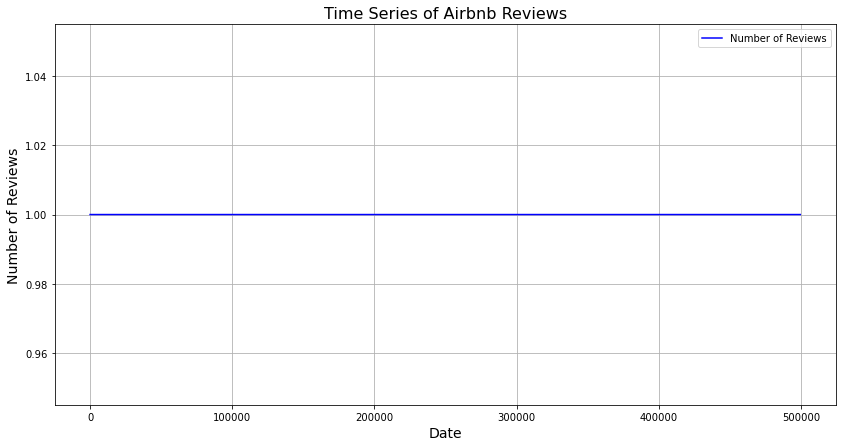

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


LinAlgError: Singular matrix

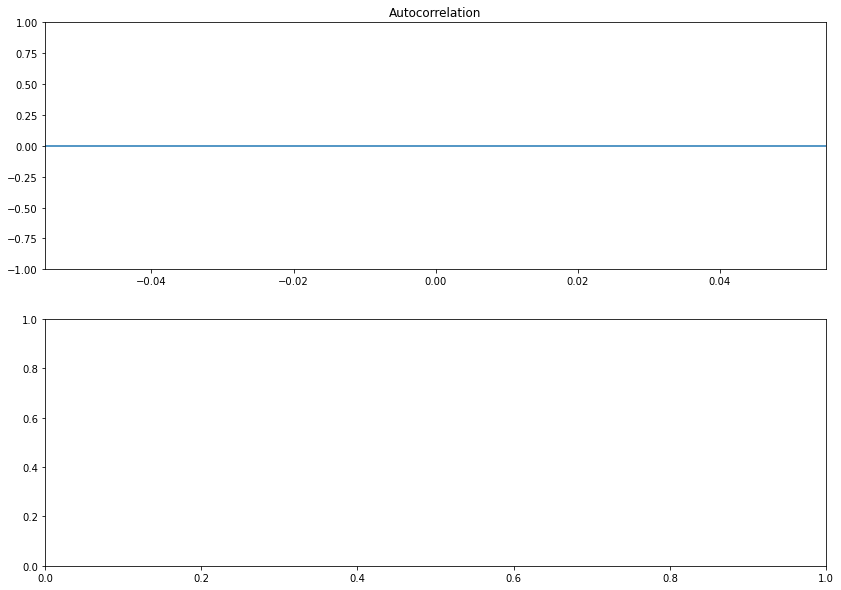

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = 'reviews.csv'
reviews_df = pd.read_csv(file_path)

# 数据预处理
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
daily_reviews = reviews_df.groupby(reviews_df.index).size()

# 绘制时间序列图
plt.figure(figsize=(14, 7))
sns.lineplot(x=daily_reviews.index, y=daily_reviews, label='Number of Reviews', color='blue')
plt.title('Time Series of Airbnb Reviews', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 绘制ACF和PACF
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
plot_acf(daily_reviews, ax=ax[0], lags=50)
plot_pacf(daily_reviews, ax=ax[1], lags=50)
plt.show()

# 趋势与季节性分解
decomposition = seasonal_decompose(daily_reviews, model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(daily_reviews, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='black')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

# 拟合ARIMA模型
model = ARIMA(daily_reviews, order=(1, 1, 1))
arima_result = model.fit()

# 打印模型摘要
arima_summary = arima_result.summary()
print(arima_summary)

# 绘制预测结果
daily_reviews = daily_reviews.to_frame(name='reviews')
daily_reviews['forecast'] = arima_result.predict(start=0, end=len(daily_reviews)-1, dynamic=False)

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_reviews, x=daily_reviews.index, y='reviews', label='Original', color='blue')
sns.lineplot(data=daily_reviews, x=daily_reviews.index, y='forecast', label='Forecast', color='red')
plt.title('ARIMA Model - Original and Forecasted Data', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()